## Example of how to download a raster area using the CopernicusDownloader class

Authenticated using refresh token.


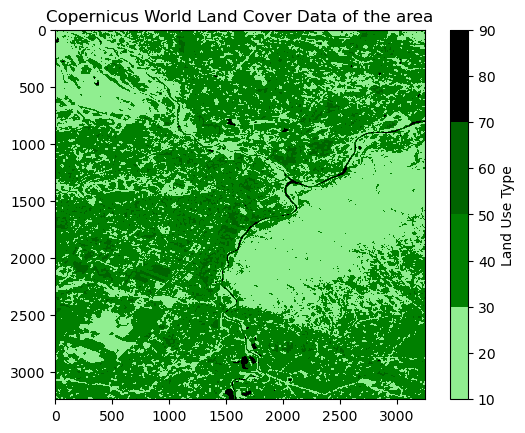

In [14]:
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
    )

bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query="Piazza Castello, Torino", method="from_center_radius", radius_km=15)
# we are using the "from_center_radius" method to get the bounding box coordinates, it gets the bounding box from a center point and a radius in km
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"

copernicus_area = copernicus_downloader.download_raster_area(
        bounding_box,
        use_oidc=False
    )
# use_oidc=False indicates we are using the client_id and client_secret for authentication
# with use_oidc=True, we would use the OpenID Connect authentication method

raster_data = copernicus_area["data"]

# Plot the raster data
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Cover Data of the area')

plt.show()

In [1]:
import json
from data.boundingbox.BoundingBox import BoundingBox
from data.downloader.CopernicusDownloader import CopernicusDownloader
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

copernicus_downloader = CopernicusDownloader(
        client_id="sh-a24a739d-d123-419b-a409-81a190c436c2",
        client_secret="dcUnE32uBB1gLvlxyi3qOeUPdGGpNMRs",
        token_url='https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token'
    )

# Define the bounding box coordinates with bbox property
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [12.4, 41.8],
                        [12.6, 41.8],
                        [12.6, 42.0],
                        [12.4, 42.0],
                        [12.4, 41.8]
                    ]
                ]
            },
            "properties": {}
        }
    ]
}

# Salva i dati GeoJSON in un file
with open('bounding_box.geojson', 'w') as f:
    json.dump(geojson_data, f, indent=4)

# Load the GeoJSON data from the file
with open('bounding_box.geojson', 'r') as f:
    geojson_content = f.read()

# Create a BoundingBox instance and use the from_geojson method
bbox = BoundingBox()
bounding_box = bbox.get_bounding_box(query=None, method='from_geojson', geojson=geojson_content)

print(bounding_box)
# we are using the "from_geojson" method to get the bounding box coordinates, it gets the bounding box from a GeoJSON data
# different methods are available to get the bounding box coordinates, such as "from_coordinates" and "from_geojson"

copernicus_area = copernicus_downloader.download_raster_area(
        bounding_box,
        use_oidc=False
    )
# use_oidc=False indicates we are using the client_id and client_secret for authentication
# with use_oidc=True, we would use the OpenID Connect authentication method

raster_data = copernicus_area["data"]

# Plot the raster data
cmap_colors = ["white", "lightgreen", "green", "darkgreen", "black"]
cmap = ListedColormap(cmap_colors[1:])
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Land Use Type')
plt.title('Copernicus World Land Cover Data of the area')

plt.show()

POLYGON ((12.4 41.8, 12.6 41.8, 12.6 42, 12.4 42, 12.4 41.8))
Authenticated using refresh token.


AttributeError: 'Polygon' object has no attribute 'to_geojson'